In [1]:
#載入所需函示庫

#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

### 作答注意事項

1. 未定義自變數因變數，全錯（16.9, 16.13, 16.45）  
    並且這應該是在畫散佈圖、做線性回歸前就定義好的，否則你到底在對什麼問題做分析呢？（所以也不可用回歸的結論來說你的X,y分別是什麼）  
    （16.9, 16.13, 16.45以外的題目因為都是接續的照理來說也要全錯，不過因為是第一次作業，所以這次只全扣以上三題分數，其他沒因此扣分）
2. 畫完散佈圖才能做線性回歸  
    （你沒有確定過線性關係，怎麼能做線性回歸呢？)
3. 畫完散佈圖應說明你從圖中得到的資訊（線性關係）  
    （不然不知道你畫的圖是想表示什麼，就像以前畫完histogram也要說你得到常態分配的資訊一樣）
4. 任何關於linear的檢驗都應先用散佈圖驗證線性關係，確認散佈圖後才可以用b1或相關係數的t 檢定來做強度或方向的測試，不可單用 “b1” 或 “相關係數” 說明線性關係  
    所以16.31, 16.41等提到linear的題目，都應先畫散佈圖確認線性關係，或是也可以說根據16.9/16.13的散佈圖已經確認過線性關係...等。  
    (由於這是第一次作業，只要16.9, 16.13有畫散佈圖就不扣分，下次開始扣分。)


In [2]:
def c_of_c_test(r, n):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    t_critical = stats.t.ppf(0.975, n - 2)
    pval = stats.t.sf(np.abs(t_value), n - 2)*2
    print('r = ', r)
    print('t_critical = ', t_critical)
    print('t = ', t_value)
    print('p_value = ', pval)
    return t_valu

## 16.9 (20%) (scatter plot 5%, explanation of plot 5%, summary 5%, explanation of coefficient 5%)
X(independent variable) - Age  
y(dependent variable) - Employment(Number of weeks on the job)

In [3]:
#讀取資料集
df16_9 = pd.read_excel('Xr16-09.xlsx')
print('Dataset:')
display(df16_9)

Dataset:


,Age,Employment
0,37,22
1,33,27
2,53,27
3,29,27
4,24,29
...,...,...
75,32,27
76,48,26
77,51,26
78,42,26


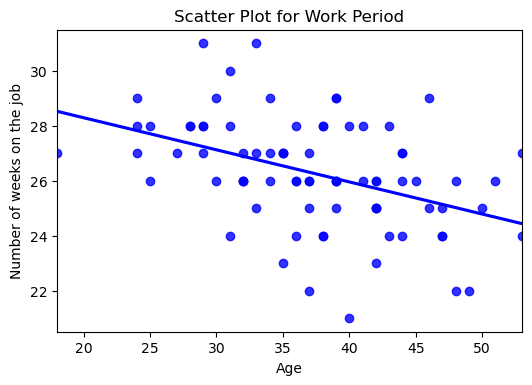

In [4]:
_ = sns.regplot(x='Age', y= 'Employment', data = df16_9, color = 'b', ci = None)
plt.title('Scatter Plot for Work Period')
plt.xlabel('Age')
plt.ylabel('Number of weeks on the job')
plt.show()

According to the scatter plot, we can see that there is linear relationship between Age and Job tenure. Thus, we can apply Simple linear regression with OLS.

In [5]:
# Fit regression model 
df16_result1 = smf.ols('Employment~ Age', data=df16_9).fit()
# Inspect the results
print(df16_result1.summary())

b1_1 = df16_result1.params[1]
b0_1 = df16_result1.params[0]
print("Estimated model: y = %0.4f + %0.4f x" % (b0_1, b1_1))

                            OLS Regression Results                            
Dep. Variable:             Employment   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.10
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           5.77e-05
Time:                        15:46:24   Log-Likelihood:                -160.11
No. Observations:                  80   AIC:                             324.2
Df Residuals:                      78   BIC:                             329.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6331      1.044     29.338      0.0

#### (a) Regression line: $\hat{y}$ = 30.6331 – 0.1169x  
#### (b) The slope coefficient indicates that for each additional year of age, the job tenure decreases on average by .1169.  b0= 30.63 is the y-intercept.

## 16.13  (20%) (scatter plot 5%, explanation of plot 5%, summary 5%, explanation of coefficient 5%)
X(independent variable) - Hours(Number of hours the engine has been run)  
y(dependent variable) - Price(in$1000s)

In [6]:
#讀取資料集
df16_13 = pd.read_excel('Xr16-13.xlsx')
print('Head of dataset:')
display(df16_13.head())
print('Tail of dataset:')
display(df16_13.tail())

Head of dataset:


,Hours,Price
0,1043,25
1,1269,30
2,895,26
3,986,29
4,853,28


Tail of dataset:


,Hours,Price
55,1259,28
56,1183,29
57,1118,27
58,1610,28
59,1661,26


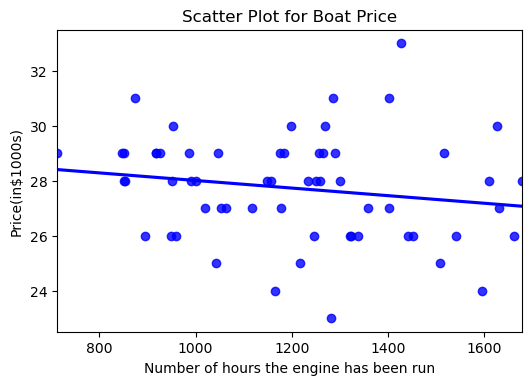

In [7]:
_ = sns.regplot(x='Hours', y= 'Price', data = df16_13, color = 'b', ci = None)
plt.title('Scatter Plot for Boat Price')
plt.xlabel('Number of hours the engine has been run')
plt.ylabel('Price(in$1000s)')
plt.show()

According to the scatter plot, we can see that there is linear relationship between Price and Running time.  Thus, we can apply Simple linear regression with OLS.

In [8]:
# Fit regression model 
df16_result2 = smf.ols('Price~ Hours', data=df16_13).fit()
# Inspect the results
print("OLS regression summary: alpha(two tail) = 0.05\n")
print(df16_result2.summary())

b1_2 = df16_result2.params[1]
b0_2 = df16_result2.params[0]
print("Estimated model: y = %0.4f + %0.4f x" % (b0_2, b1_2))

OLS regression summary: alpha(two tail) = 0.05

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.869
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.177
Time:                        15:46:24   Log-Likelihood:                -122.30
No. Observations:                  60   AIC:                             248.6
Df Residuals:                      58   BIC:                             252.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

Regression line: $\hat{y}$  = 29.3912–.0014x  
For each additional hour the price decreases on average by .00138 thousand dollars or $1.38


## 16.21  (10%)
For each number of hours prices are normally distributed with constant variance and a mean that is a linear function of the number of hour.

## 16.31 (10%) (5% for each statistics)
We have shown the linear relationship using the scatter plot before.  

In [9]:
s2_e = df16_result1.mse_resid
print('MSE: ', s2_e)
s_e = df16_result1.mse_resid ** 0.5
print('Standard errors: ', s_e)
y_bar = df16_9["Employment"].mean()
print('Y_bar: ', y_bar)

MSE:  3.2876088644528787
Standard errors:  1.8131764570644742
Y_bar:  26.275


Compared to y_bar = 26.275, Se = 1.813 is relatively small. Hence our linear regression model of job tenure as a function of Age is good 

In [10]:
R2 = df16_result1.rsquared
print("R2 = ", R2)
R = np.sign(b1_1)*R2**0.5
print("r = ", R)

R2 =  0.18837318744318876
r =  -0.4340198007501372


R2 = 0.19 which means about 19% of the variation in the emplyment is explained by the variation in age. The rest(81%) remains unexplained by this model.  
r = -0.434, 0.25<|r|<0.5, Hence there is a moderately weak negative linear relationship between the job tenure and age.

## 16.35 (10%)
H0: b1 >= 0  
H1: b1 < 0  
alpha = 0.05 (one tail)  
According to the table in 16.13. The pvalue of Hours/2 = 0.0885 > alpha = 0.05.  
Thus, we can not reject the null hypothesis at a significance level of 0.05.  
There is not enough evidence to infer that as hours of engine use increase the price decreases.

## 16.41 (10%) 
H0: r >= 0  
H1: r < 0  
alpha = 0.05 (one tail)

In [11]:
def r_ttest(r, n, alpha):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    LCL = stats.t.ppf(alpha/2, n - 2)
    UCL = stats.t.ppf(1-alpha/2, n - 2)
    print('t = ', t_value)
    print('t_LCL = ', LCL)
    print('t_UCL = ', UCL)
    return t_value, LCL, UCL

In [22]:
R2 = df16_result2.rsquared
print("R2 = ", R2)
r = np.sign(b1_2)*R2**0.5
print("r = ", r)

n = len(df16_13)
alpha = 0.1

t_value, LCL, UCL = r_ttest(r, n, alpha)

R2 =  0.031210742423356752
r =  -0.17666562320767656
t =  -1.36694609701437
t_LCL =  -1.6715527621536728
t_UCL =  1.671552762153672


We have shown the linear relationship using the scatter plot before.  
The t statistics of Hours (-1.367) > LCL of Hours at alpha = 0.05 (-1.67).  
Thus, we can not reject the null hypothesis at a significance level of 0.05.  
There is not enough evidence to infer a negative linear relationship.

## 16.45 (20%)  (scatter plot 5%, explanation of plot 5%, (a) 5%, (b) 5%)
X(independent variable) - Education(years of Education)  
y(dependent variable) - Time spent on the Internet in a tipycal day day(assume unit=minutes)

In [13]:
#讀取資料集
df16_45 = pd.read_excel('Xr16-45.xlsx')
print('Head of dataset:')
display(df16_45.head())
print('Tail of dataset:')
display(df16_45.tail())

Head of dataset:


,Education,Time
0,13,80
1,12,80
2,16,90
3,12,100
4,16,90


Tail of dataset:


,Education,Time
195,12,80
196,14,70
197,12,70
198,15,100
199,12,90


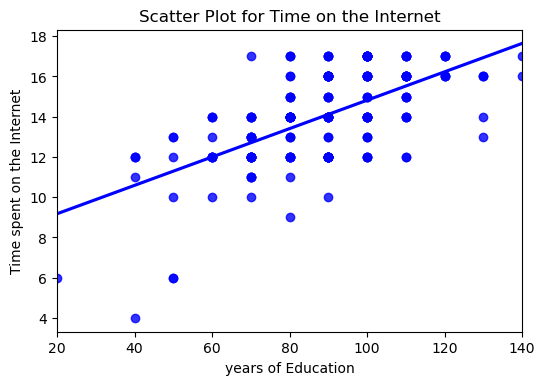

In [14]:
_ = sns.regplot(x='Time', y= 'Education', data = df16_45, color = 'b', ci = None)
plt.title('Scatter Plot for Time on the Internet')
plt.xlabel('years of Education')
plt.ylabel('Time spent on the Internet')
plt.show()

#### According to the scatter plot, we can see that there is linear relationship between Education and Time on Internet.  Thus, we can apply Simple linear regression with OLS.

In [15]:
# Fit regression model 
df16_result3 = smf.ols('Time~ Education', data=df16_45).fit()
# Inspect the results
print("OLS regression summary: alpha(two tail) = 0.05\n")
print(df16_result3.summary())
b1_3 = df16_result3.params[1]
b0_3 = df16_result3.params[0]
print("Estimated model: y = %0.4f + %0.4f x" % (b0_3, b1_3))

OLS regression summary: alpha(two tail) = 0.05

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           3.56e-23
Time:                        15:46:24   Log-Likelihood:                -836.86
No. Observations:                 200   AIC:                             1678.
Df Residuals:                     198   BIC:                             1684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

### (a)
H0 : r = 0  
H1 : r != 0  
alpha = 0.05 (two-tail)  

In [16]:
R2 = df16_result3.rsquared
print("R2 = ", R2)
r = np.sign(b1_3)*R2**0.5
print("r = ", r)

n = len(df16_45)
alpha = 0.05
t_value, LCL, UCL = r_ttest(r, n, alpha)

R2 =  0.392105743052653
r =  0.6261834739536433
t =  11.301085914436873
t_LCL =  -1.972017477833896
t_UCL =  1.9720174778338955


We have shown the linear relationship using the scatter plot before.  
The t statistics(11.30) > UCL(1.97) at alpha = 0.05. We can reject the null hypothesis at a significance level of 0.05.  
Thus, there is enough evidence to conclude that there is a linear relationship between the two variables.

### (b)
According to the table above, LCL of Education = 4.59 and UCL of Education = 6.53.